In [125]:
import pandas as pd

xl = pd.ExcelFile("RetailPulseAssignmentData.xlsx")
xl.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [97]:
df1 = xl.parse("Year 2009-2010")
df2 = xl.parse("Year 2010-2011")
df = pd.concat([df1,df2], axis=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [99]:
# different types of data in each coloumn
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
dtypeCount
# if we want to cast a datatype on a coloumn
#df["Invoice"] = df["Invoice"].astype('str')

[<class 'int'>    1047871
 <class 'str'>      19500
 Name: Invoice, dtype: int64,
 <class 'int'>    932385
 <class 'str'>    134986
 Name: StockCode, dtype: int64,
 <class 'str'>      1062985
 <class 'float'>       4382
 <class 'int'>            4
 Name: Description, dtype: int64,
 <class 'int'>    1067371
 Name: Quantity, dtype: int64,
 <class 'pandas._libs.tslibs.timestamps.Timestamp'>    1067371
 Name: InvoiceDate, dtype: int64,
 <class 'float'>    1067371
 Name: Price, dtype: int64,
 <class 'float'>    1067371
 Name: Customer ID, dtype: int64,
 <class 'str'>    1067371
 Name: Country, dtype: int64]

In [28]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
7,Country,43
3,Quantity,1057
5,Price,2807
1,StockCode,5305
2,Description,5698
6,Customer ID,5942
4,InvoiceDate,47635
0,Invoice,53628


In [200]:
# get total spend from each invoice
df['Total'] = df['Price'] * df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


### Failed attemps to classify the data

In [69]:
# Total money spent by customers from each country 
temp = df.groupby('Country')['Total'].sum()
tempDF = pd.DataFrame({'Country':temp.index, 'Spend':temp.values})
tempDF = tempDF.sort_values('Spend', ascending=False)
tempDF = tempDF.iloc[:20]
tempDF.head()

,Country,Spend
40,United Kingdom,1.638258e+07
11,EIRE,6.155196e+05
26,Netherlands,5.485249e+05
15,Germany,4.179886e+05
14,France,3.281918e+05


<AxesSubplot:xlabel='Country'>

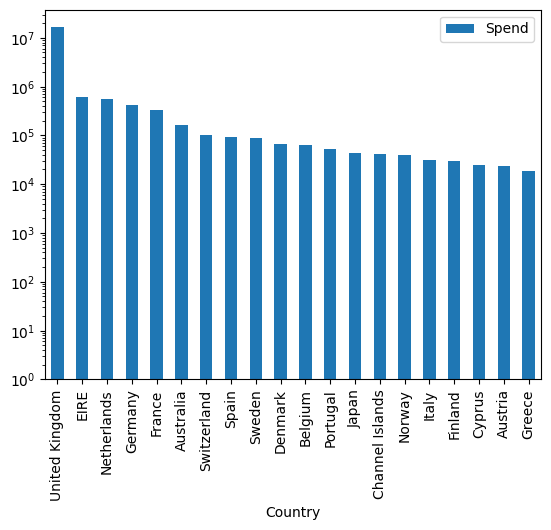

In [95]:
import matplotlib.pyplot as plt
tempDF.plot(x='Country', y='Spend', kind='bar', log=True)

In [112]:
#Number of customers from each country:
temp = df.groupby('Country')['Customer ID'].unique()
tempDF = pd.DataFrame({'Country':temp.index, 'Customers':temp.values})
tempDF.head()

,Country,Customers
0,Australia,"[16321.0, 12424.0, 12422.0, 12416.0, 12389.0, ..."
1,Austria,"[12358.0, 12440.0, 12373.0, 12370.0, 12360.0, ..."
2,Bahrain,"[nan, 12355.0, 12353.0]"
3,Belgium,"[12362.0, 12417.0, 12431.0, 12361.0, 12402.0, ..."
4,Bermuda,[nan]


In [124]:
tempDF['Count'] = [len(tempDF.iloc[i]['Customers']) for i in range(tempDF.shape[0])]
tempDF = tempDF.sort_values('Count', ascending=False)
tempDF.head(10)

,Country,Customers,Count
40,United Kingdom,"[13085.0, 13078.0, 15362.0, 18102.0, 18087.0, ...",5411
15,Germany,"[12533.0, 12471.0, 12705.0, 13813.0, 12600.0, ...",107
14,France,"[12682.0, 12615.0, 12490.0, 12523.0, 12437.0, ...",96
34,Spain,"[12484.0, 12510.0, 12540.0, 12557.0, 12539.0, ...",41
3,Belgium,"[12362.0, 12417.0, 12431.0, 12361.0, 12402.0, ...",29
30,Portugal,"[12758.0, 12785.0, 16291.0, 12792.0, 12800.0, ...",25
36,Switzerland,"[13520.0, 12371.0, 12418.0, 12377.0, 13501.0, ...",23
26,Netherlands,"[14646.0, 12759.0, 12789.0, 12813.0, 12382.0, ...",23
35,Sweden,"[12487.0, 17404.0, 12483.0, 12482.0, 12495.0, ...",20
20,Italy,"[12349.0, 12586.0, 14912.0, 12594.0, 12514.0, ...",17


### Q. What is the most popular time of year based on this sales data?
#### A. Months of Oct, Nov(most), Dec

In [131]:
#Number of sales per month:
temp = df.groupby([df.InvoiceDate.dt.month]).count().rename_axis(['month'])['InvoiceDate'].reset_index(name='Entries')
temp

,month,Entries
0,1,66702
1,2,57095
2,3,78259
3,4,63973
4,5,72353
5,6,76857
6,7,72901
7,8,68590
8,9,92317
9,10,119840


In [136]:
temp["month"] = temp['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

<AxesSubplot:xlabel='month'>

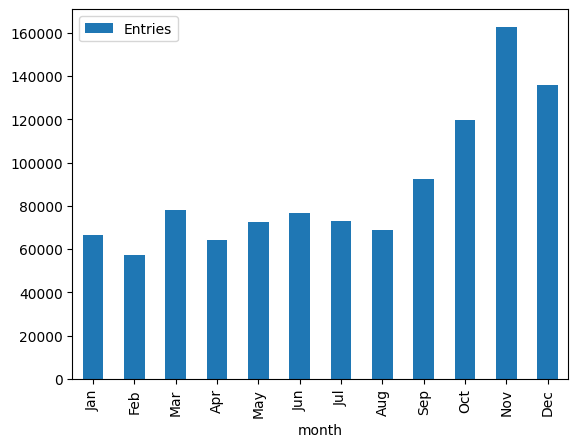

In [137]:
temp.plot(x='month', y='Entries', kind='bar')

### Q. Is there any seasonality in data? Explain with supportive evidence.
#### A. As we can notice in the above and below graph we do have a increase in sales towards the end of the year

In [167]:
df1['Total'] = df1['Price'] * df1['Quantity']
temp09_10 = df1.groupby([df1.InvoiceDate.dt.month])['Total'].sum()
temp09_10 = pd.DataFrame({'Month':temp09_10.index, 'Spend':temp09_10.values})


df2['Total'] = df2['Price'] * df2['Quantity']
temp10_11 = df2.groupby([df2.InvoiceDate.dt.month])['Total'].sum()
temp10_11 = pd.DataFrame({'Month':temp10_11.index, 'Spend':temp10_11.values})

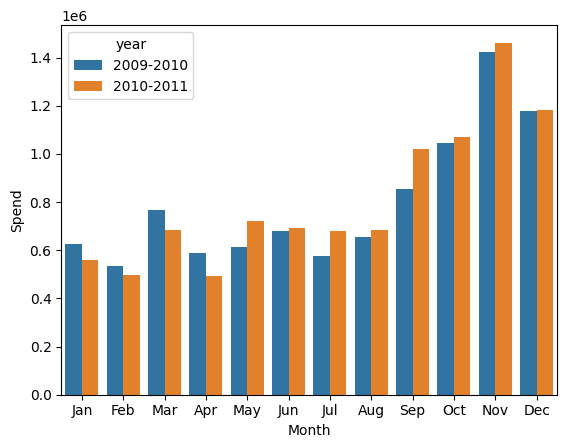

In [170]:
import seaborn as sns
temp09_10['year']='2009-2010'
temp10_11['year']='2010-2011'
res=pd.concat([temp09_10,temp10_11])
res["Month"] = temp10_11['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
sns.barplot(x=res.Month ,y=res.Spend,data=res,hue='year')
plt.show()

### Lifetime of Customers
#### -- How many times does a customers Return

In [204]:
#How many times does customers come back:
temp = df.groupby(['Customer ID'])['Invoice'].unique()
temp = pd.DataFrame({'CustomerID':temp.index, 'Invoice':temp.values})

temp['Returns'] = [len(temp.iloc[i]['Invoice']) for i in range(temp.shape[0])]
temp.head(10)

,CustomerID,Invoice,Returns
0,12346.0,"[491725, 491742, 491744, 492718, 492722, 49341...",17
1,12347.0,"[529924, 537626, 542237, 549222, 556201, 56203...",8
2,12348.0,"[524140, 539318, 541998, 548955, 568172]",5
3,12349.0,"[C490283, 506394, 508728, 529344, 577609]",5
4,12350.0,[543037],1
5,12351.0,[536012],1
6,12352.0,"[532430, 535838, 544156, 545323, C545329, C545...",13
7,12353.0,"[529304, 553900]",2
8,12354.0,[550911],1
9,12355.0,"[509300, 552449]",2


In [210]:
temp1 = temp.groupby(temp.Returns)['CustomerID'].count()
tdf = pd.DataFrame({'Returns':temp1.index, 'No. of Customers':temp1.values})

tdf.head(10)

,Returns,No. of Customers
0,1,1461
1,2,875
2,3,622
3,4,482
4,5,390
5,6,281
6,7,254
7,8,177
8,9,158
9,10,138


<AxesSubplot:xlabel='Returns', ylabel='No. of Customers'>

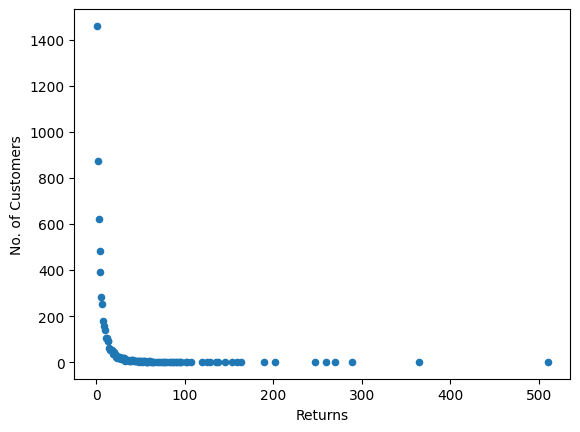

In [209]:
tdf.plot(x='Returns', y='No. of Customers', kind='scatter')